In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

sea_level = pd.read_csv("inputs/sealevel.csv")
data = pd.read_csv("inputs/Zip_homes.csv")
filtered_data = sea_level[::3]

# Requirement 1: Limit to 12 rows per year
years = filtered_data['Year'].unique()
limited_rows = []

for year in years:
    year_data = filtered_data[filtered_data['Year'] == year]
    limited_rows.append(year_data.iloc[:12])

filtered_data = pd.concat(limited_rows)

# Transpose the DataFrame
transposed_data = data.T

# If the index (dates) should be the header
transposed_data.reset_index(inplace=True)
new_header = transposed_data.iloc[0]
transposed_data = transposed_data[1:]
transposed_data.columns = new_header

# Rename 'RegionName' to 'Year'
transposed_data.rename(columns={'RegionName': 'Year'}, inplace=True)
transposed_data.set_index('Year', inplace=True)

# Format 'Year' column in filtered_data
filtered_data['Year'] = pd.to_datetime(filtered_data['Year'], format='%Y') + filtered_data.groupby('Year').cumcount().apply(lambda x: DateOffset(months=x))
filtered_data['Year'] = filtered_data['Year'].dt.to_period('M').astype(str)

# Ensure there are no duplicate months
filtered_data = filtered_data[~filtered_data.index.duplicated(keep='first')]

# Set the index of the filtered_data DataFrame
filtered_data.set_index('Year', inplace=True)

# Merge dataframes on 'Year', using an outer join to handle missing data
merged_data = pd.merge(transposed_data, filtered_data, how='outer', left_index=True, right_index=True)

# Rename the index
merged_data.index = merged_data.index.rename('Date')

# Save the merged DataFrame to a new CSV file
merged_data.to_csv('inputs/merged_data.csv')

print(merged_data.head())

/Users/andrewbosland/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  warnings.warn(


         10025.0  60657.0  10023.0  60614.0  79936.0  10002.0  60640.0  \
Date                                                                     
1993-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1993-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1993-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1993-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1993-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

         77084.0  94109.0  75070.0  ...  76005.0  81225.0  \
Date                                ...                     
1993-01      NaN      NaN      NaN  ...      NaN      NaN   
1993-02      NaN      NaN      NaN  ...      NaN      NaN   
1993-03      NaN      NaN      NaN  ...      NaN      NaN   
1993-04      NaN      NaN      NaN  ...      NaN      NaN   
1993-05      NaN      NaN      NaN  ...      NaN      NaN   

         TotalWeightedObservations  GMSL_noGIA  StdDe

In [2]:
# Create a new DataFrame with data from 2010-01 to 2017-09
filtered_merged_data = merged_data.loc['2010-01':'2017-09']

# Print the new DataFrame
print(filtered_merged_data.head())

# If you want to save the new DataFrame to a CSV file
filtered_merged_data.to_csv('inputs/filtered_merged_data.csv')

          10025.0   60657.0  10023.0  60614.0   79936.0  10002.0  60640.0  \
Date                                                                        
2010-01  775000.0  349900.0      NaN      NaN  134700.0      NaN      NaN   
2010-02  725000.0  349000.0      NaN      NaN  130000.0      NaN      NaN   
2010-03  762500.0  339619.5      NaN      NaN  129900.0      NaN      NaN   
2010-04  725000.0  349000.0      NaN      NaN  129900.0      NaN      NaN   
2010-05  732500.0  334500.0      NaN      NaN  131450.0      NaN      NaN   

          77084.0  94109.0   75070.0  ...  76005.0  81225.0  \
Date                                  ...                     
2010-01  119900.0      NaN  191315.0  ...      NaN      NaN   
2010-02  119850.0      NaN  194900.0  ...      NaN      NaN   
2010-03  121950.0      NaN  190995.0  ...      NaN      NaN   
2010-04  120000.0      NaN  195000.0  ...      NaN      NaN   
2010-05  120000.0      NaN  194950.0  ...      NaN      NaN   

         TotalWeig

In [3]:
import pandas as pd

# Assuming filtered_merged_data is the given DataFrame

Coastal = [33137.0, 33129.0, 33131.0, 33308.0, 33062.0, 70124.0, 70122.0, 70126.0, 77505.0, 77058.0, 77015.0, 10069.0, 10010.0, 10305.0, 10314.0, 11214.0, 11209.0]
Inland = [94112.0, 33127.0, 33145.0, 33130.0, 33060.0, 70118.0, 70119.0, 77504.0, 77062.0, 10023.0, 10003.0, 10304.0, 11204.0]
additional_columns = [
    "TotalWeightedObservations",
    "GMSL_noGIA",
    "StdDevGMSL_noGIA",
    "SmoothedGSML_noGIA",
    "GMSL_GIA",
    "StdDevGMSL_GIA",
    "SmoothedGSML_GIA",
    "SmoothedGSML_GIA_sigremoved",
]

selected_columns = Coastal + Inland + additional_columns

filtered_zip = filtered_merged_data.loc[:, selected_columns]
filtered_zip = filtered_zip.reset_index()
filtered_zip.to_csv('inputs/filtered_zip.csv', index=False)
print(filtered_zip)

       Date   33137.0   33129.0   33131.0   33308.0   33062.0   70124.0  \
0   2010-01       NaN       NaN  300000.0  356200.0  339000.0  289000.0   
1   2010-02       NaN       NaN  305000.0  349900.0  329000.0  270300.0   
2   2010-03       NaN       NaN  299000.0  309000.0  291027.5  282450.0   
3   2010-04       NaN       NaN  298000.0  299000.0  285855.0  262000.0   
4   2010-05       NaN       NaN  319000.0  299000.0  275000.0  269000.0   
..      ...       ...       ...       ...       ...       ...       ...   
88  2017-05  499888.0  558250.0  470000.0  429500.0  395000.0  474000.0   
89  2017-06  515350.0  545000.0  475000.0  439000.0  398826.0  475000.0   
90  2017-07  539000.0  549000.0  470000.0  439000.0  399000.0  489000.0   
91  2017-08  549000.0  539777.0  485000.0  427000.0  395000.0  469000.0   
92  2017-09  549000.0  539000.0  485000.0  429900.0  395000.0  465000.0   

     70122.0   70126.0   77505.0  ...   10304.0   11204.0  \
0        NaN       NaN  169500.0  ... 

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


filtered_zip = filtered_zip.drop(columns=['Date'])

# Initialize a dictionary to store the results
results = {}

# Loop through the columns in the DataFrame
for col in filtered_zip.columns:

    # Skip the 'GMSL_noGIA' column
    if col == 'GMSL_noGIA':
        continue

    # Remove NaNs from the house price data
    y = filtered_zip[col].dropna().values.reshape(-1, 1)

    # Select corresponding GMSL_noGIA values
    x = filtered_zip['GMSL_noGIA'][filtered_zip[col].notnull()].values.reshape(-1, 1)

    # Fit the linear regression model
    model = LinearRegression().fit(x, y)

    # Save the results
    results[col] = {
        'coefficient': model.coef_[0][0],
        'intercept': model.intercept_[0],
        'r_squared': model.score(x, y)
    }

# Print the results
for zipcode, result in results.items():
    print(f"{zipcode}: Coefficient: {result['coefficient']:.2f}, Intercept: {result['intercept']:.2f}, R-squared: {result['r_squared']:.2f}")

33137.0: Coefficient: 856.47, Intercept: 518485.85, R-squared: 0.01
33129.0: Coefficient: 5410.10, Intercept: 329368.11, R-squared: 0.74
33131.0: Coefficient: 4601.97, Intercept: 323855.24, R-squared: 0.65
33308.0: Coefficient: 2931.93, Intercept: 291626.75, R-squared: 0.63
33062.0: Coefficient: 3303.70, Intercept: 264029.81, R-squared: 0.78
70124.0: Coefficient: 6042.30, Intercept: 235853.79, R-squared: 0.78
70122.0: Coefficient: -170.50, Intercept: 217812.84, R-squared: 0.00
70126.0: Coefficient: -144.64, Intercept: 120712.98, R-squared: 0.02
77505.0: Coefficient: 1783.22, Intercept: 148888.45, R-squared: 0.59
77058.0: Coefficient: 1779.23, Intercept: 151581.49, R-squared: 0.19
77015.0: Coefficient: 1325.01, Intercept: 74853.67, R-squared: 0.67
10069.0: Coefficient: -9674.39, Intercept: 2752857.91, R-squared: 0.08
10010.0: Coefficient: -10430.28, Intercept: 2841005.20, R-squared: 0.08
10305.0: Coefficient: 3552.17, Intercept: 324260.24, R-squared: 0.57
10314.0: Coefficient: 3617.60, 

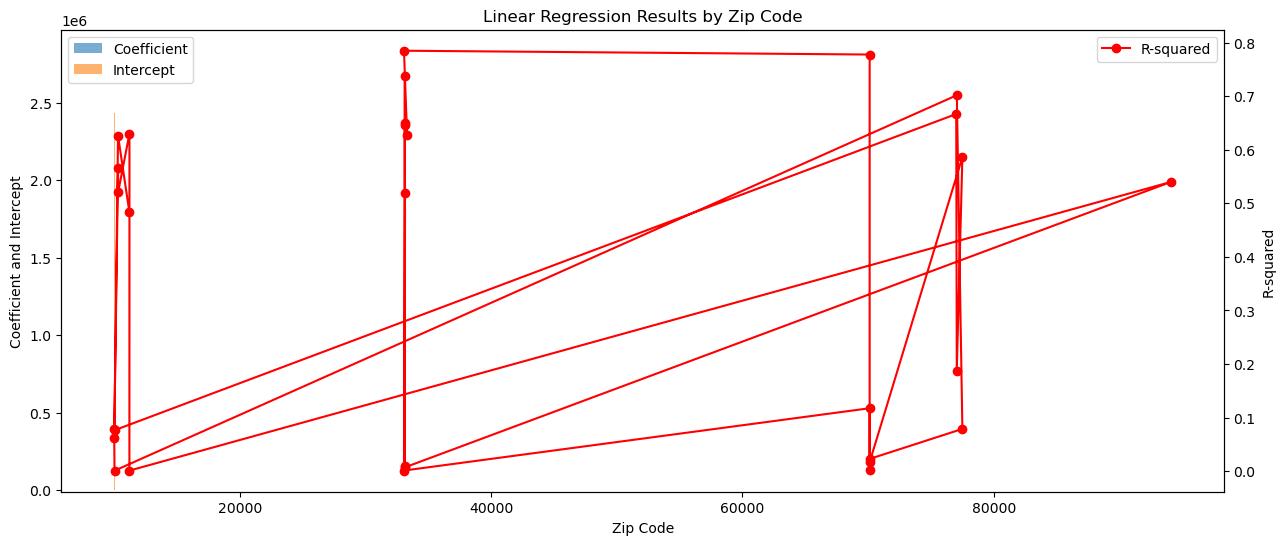

In [12]:
import matplotlib.pyplot as plt

# Filter the results to only include zip codes
zip_code_results = {k: v for k, v in results.items() if isinstance(k, float)}

# Prepare data for the plot
zip_codes = list(zip_code_results.keys())
coefficients = [result['coefficient'] for result in zip_code_results.values()]
intercepts = [result['intercept'] for result in zip_code_results.values()]
r_squared = [result['r_squared'] for result in zip_code_results.values()]

# Set up the plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot coefficients and intercepts
ax1.bar(zip_codes, coefficients, label='Coefficient', alpha=0.6)
ax1.bar(zip_codes, intercepts, bottom=coefficients, label='Intercept', alpha=0.6)

# Set up the secondary y-axis for R-squared values
ax2 = ax1.twinx()
ax2.plot(zip_codes, r_squared, label='R-squared', color='r', marker='o')

# Set plot labels and legends
ax1.set_xlabel('Zip Code')
ax1.set_ylabel('Coefficient and Intercept')
ax2.set_ylabel('R-squared')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set plot title
plt.title('Linear Regression Results by Zip Code')

# Display the plot
plt.show()